<style>
h1{color: rgb(255, 26, 26); background-color: rgb(0, 255, 255);}
</style>
<h1><b>IN THIS PROJECT WE ARE GOING TO PREDICT CAR PRICES.</b></h1>

<style>
h2{color: rgb(163, 163, 194)}
</style>
<h2>We are trying to build a model using <u>"Machiene Learning"</u> :-</h2>

In [1]:
# Improting Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image


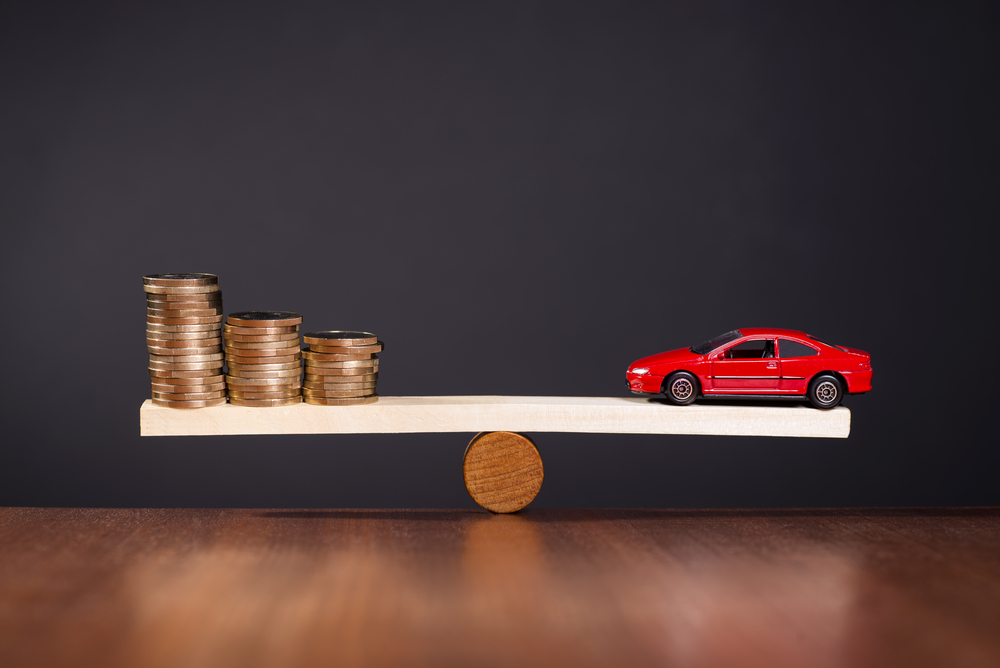

In [2]:
Image('https://qualityquote.co.za/wp-content/uploads/vehicle-budgeting.jpg')

<style>
h3{color: rgb(230, 230, 0)}
</style>
<h3>Creating <i>"car"</i> DataFrame to build our model</h3>

In [113]:
# There is a "index" coloumn in the Automobile.csv raw data set. We select is as default index. 
car = pd.read_csv('..\Data-Science-Essentials\data\Automobile.csv', index_col='index')

In [4]:
# Printing 1st 5 rows
car.head()

,Unnamed: 0,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,,
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [5]:
# Clearly visibile a unnessecery coloumn is there. We need to remove it from data frmae.
car.columns

Index(['Unnamed: 0', 'company', 'body-style', 'wheel-base', 'length',
       'engine-type', 'num-of-cylinders', 'horsepower', 'average-mileage',
       'price'],
      dtype='object')

<style>
h3{color: rgb(230, 230, 0)}
</style>
### Removing <u>"Unnessecery Column"</u> ####

In [114]:
# Dropping 'Unnamed: 0' column
car.drop('Unnamed: 0', axis=1, inplace=True)

In [115]:
# Unnamed : 0 column has been removed
car.columns

Index(['company', 'body-style', 'wheel-base', 'length', 'engine-type',
       'num-of-cylinders', 'horsepower', 'average-mileage', 'price'],
      dtype='object')

<style>
h2{color: rgb(255, 102, 0)}
</style>
## <b>General Information of our Data Frame</b> ##

In [8]:
# Overview of the Data Frame
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           61 non-null     object 
 1   body-style        61 non-null     object 
 2   wheel-base        61 non-null     float64
 3   length            61 non-null     float64
 4   engine-type       61 non-null     object 
 5   num-of-cylinders  61 non-null     object 
 6   horsepower        61 non-null     int64  
 7   average-mileage   61 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.8+ KB


<style>
h3{color: rgb(117, 163, 163)}
</style>
### <b>There is <u>"null"</u> values in our data frame..</b> ###

In [9]:
# Column wise total null values
car.isnull().sum()

company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               3
dtype: int64

<style>
h3{color: rgb(117, 163, 163)}
</style>
### Checking if there is <u>"Duplicate"</u> values in our data frame.. ###

In [10]:
car[car.duplicated]

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
32,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN


<style>
h3{color: rgb(117, 163, 163)}
</style>
### Creating a Data Frame to Store Null vaues ###

In [11]:
# Missing or null values in "Price" column stored into a variable.
car_null_values = car[car['price'].isnull()]

In [12]:
# PRINTING NULL VALUES
car_null_values

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
31,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
32,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
63,porsche,hatchback,98.4,175.7,dohcv,eight,288,17,NaN


<style>
h2{color: rgb(255, 51, 0)}
</style>
## <b>Removing <i>"null"</i> Values</b> ##

In [116]:
car.dropna(inplace=True)

In [14]:
# There is no null values now
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           58 non-null     object 
 1   body-style        58 non-null     object 
 2   wheel-base        58 non-null     float64
 3   length            58 non-null     float64
 4   engine-type       58 non-null     object 
 5   num-of-cylinders  58 non-null     object 
 6   horsepower        58 non-null     int64  
 7   average-mileage   58 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.5+ KB


<style>
h2{color: rgb(255, 102, 0)}
</style>
## <b>Checking <i>"car"</i> values</b> ##

<style>
h3{color: rgb(117, 163, 163)}
</style>
### Checking <u>Chategorical</u> Values ###

In [15]:
# Totatal Data Frame object values 1st 5 rows
car.select_dtypes(['object']).head()

,company,body-style,engine-type,num-of-cylinders
index,,,,
0,alfa-romero,convertible,dohc,four
1,alfa-romero,convertible,dohc,four
2,alfa-romero,hatchback,ohcv,six
3,audi,sedan,ohc,four
4,audi,sedan,ohc,five


<style>
h3{color: rgb(117, 163, 163)}
</style>
### Checking <b>"int"</b> and <b>"float"</b> values ###

In [16]:
# Totatal Data Frame int values 1st 5 rows
car.select_dtypes(['int']).head()

,horsepower,average-mileage
index,,
0,111,21
1,111,21
2,154,19
3,102,24
4,115,18


In [17]:
# Totatal Data Frame float values 1st 5 rows
car.select_dtypes(['float']).head()

,wheel-base,length,price
index,,,
0,88.6,168.8,13495.0
1,88.6,168.8,16500.0
2,94.5,171.2,16500.0
3,99.8,176.6,13950.0
4,99.4,176.6,17450.0


<style>
h3{color: rgb(0, 153, 51)}
</style>
### All Chatagorical Unique Values ###

In [18]:
# To print all the unique values
car_columns = car.select_dtypes(['object']).columns
for col in car_columns:
    print(car[col].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mitsubishi' 'nissan' 'porsche' 'toyota'
 'volkswagen' 'volvo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


<style>
h2{color: rgb(255, 102, 0)}
</style>
## <b>Checking column wise how many <i>Chatagorical</i> values are in the Data Set</b> ##

In [19]:
# Printing Columns of Chategorical values
car_columns

Index(['company', 'body-style', 'engine-type', 'num-of-cylinders'], dtype='object')

<style>
h2{color: rgb(0, 163, 204)}
</style>
## Ploting chategorical values to understand and visualize data ##

<style>
h3{color: rgb(102, 102, 153); background-color: rgb(204, 255, 102);}
</style>
### <b>Company Chategorical total values</b> ###

In [20]:
car['company'].value_counts()

company
toyota           7
bmw              6
mazda            5
nissan           5
audi             4
mercedes-benz    4
mitsubishi       4
volkswagen       4
alfa-romero      3
chevrolet        3
honda            3
jaguar           3
dodge            2
porsche          2
volvo            2
isuzu            1
Name: count, dtype: int64

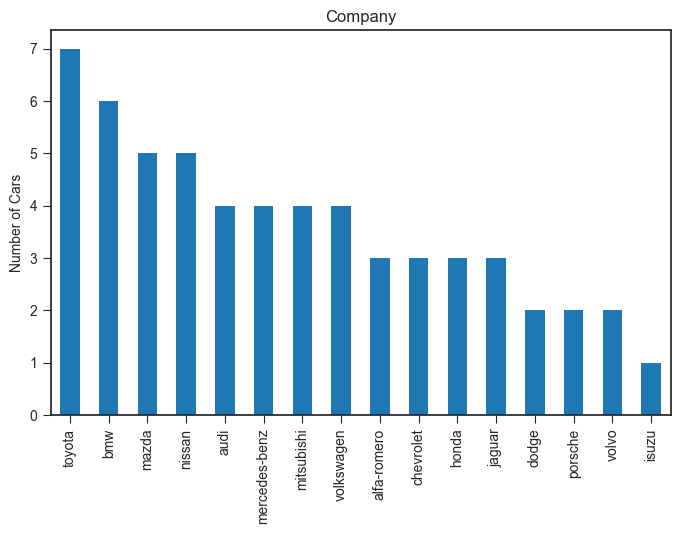

In [21]:
# Visualize Company column data

plt.figure(figsize=(8, 5))
plt.style.use('seaborn-v0_8-ticks')
car['company'].value_counts().plot(kind='bar')
plt.title('Company')
plt.ylabel('Number of Cars')
plt.xlabel('')
plt.show()

<style>
h3{color: rgb(102, 102, 153); background-color: rgb(204, 255, 102);}
</style>
### Body Style Chategorical total values ###

In [23]:
car['body-style'].value_counts()

body-style
sedan          30
hatchback      14
wagon           9
convertible     3
hardtop         2
Name: count, dtype: int64

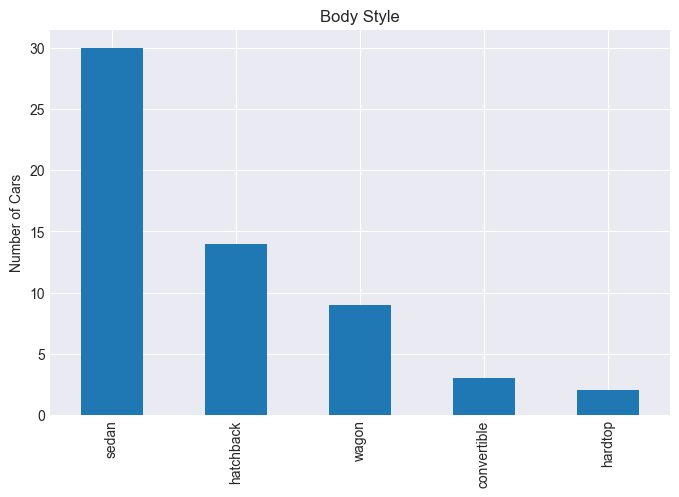

In [24]:
# Visualize Body Style column data

plt.figure(figsize=(8, 5))
plt.style.use('seaborn-v0_8-darkgrid')
car['body-style'].value_counts().plot(kind='bar')
plt.title('Body Style')
plt.ylabel('Number of Cars')
plt.xlabel('')
plt.show()

<style>
h3{color: rgb(102, 102, 153); background-color: rgb(204, 255, 102);}
</style>
### Engine Type Chategorical total values ###

In [25]:
car['engine-type'].value_counts()

engine-type
ohc      44
dohc      5
ohcv      5
ohcf      2
l         1
rotor     1
Name: count, dtype: int64

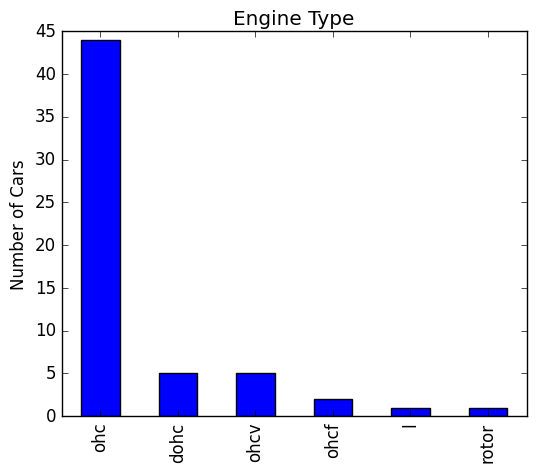

In [26]:
# Visualize Engine Type column data

plt.figure(figsize=(6, 5))
plt.style.use('classic')
car['engine-type'].value_counts().plot(kind='bar')
plt.title('Engine Type')
plt.ylabel('Number of Cars')
plt.xlabel('')
plt.show()

<style>
h3{color: rgb(102, 102, 153); background-color: rgb(204, 255, 102);}
</style>
### Number of Cylinders Chategorical total values ###

In [27]:
car['num-of-cylinders'].value_counts()

num-of-cylinders
four      37
six       11
five       5
eight      2
three      1
twelve     1
two        1
Name: count, dtype: int64

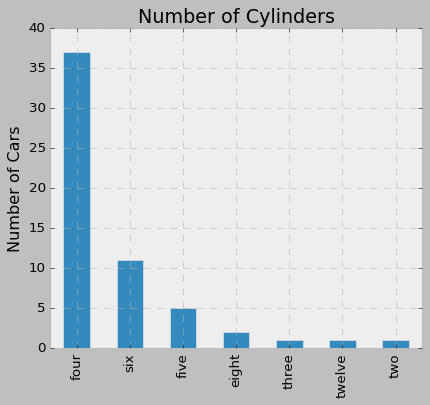

In [28]:
# Visualize Number of Cylinders Type column data

plt.figure(figsize=(6, 5))
plt.style.use('bmh')
car['num-of-cylinders'].value_counts().plot(kind='bar')
plt.title('Number of Cylinders')
plt.ylabel('Number of Cars')
plt.xlabel('')
plt.show()

<style>
h2{color: rgb(255, 102, 0)}
</style>
## <b>Checking Numeric Columns Values<b> ##

In [29]:
car.describe()

,wheel-base,length,horsepower,average-mileage,price
count,58.000000,58.000000,58.000000,58.000000,58.000000
mean,98.620690,173.646552,106.051724,25.534483,15387.000000
std,6.810589,14.005616,48.915402,7.932203,11320.259841
min,88.400000,141.100000,48.000000,13.000000,5151.000000
25%,94.500000,165.300000,68.000000,19.000000,6808.500000
50%,96.400000,171.450000,100.000000,24.500000,11095.000000
75%,101.800000,182.775000,122.500000,31.000000,18120.500000
max,120.900000,208.100000,262.000000,47.000000,45400.000000


<style>
h3{color: rgb(117, 163, 163)}
</style>
### Ploting Numeric Values to Visualize Data ###

<Figure size 800x1200 with 0 Axes>

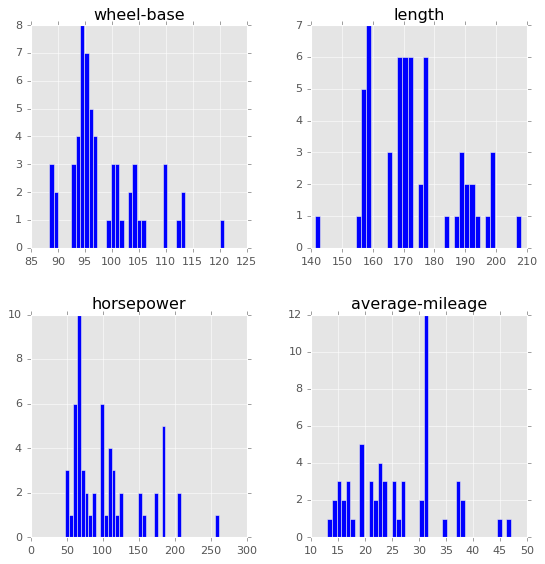

In [30]:
plt.figure(figsize=(10, 15))
plt.style.use('ggplot')
car[['wheel-base', 'length', 'horsepower', 'average-mileage']].hist(bins=40, figsize=(8,8), color='b')
plt.show()

<style>
h1{color: rgb(255, 204, 0); background-color: rgb(102, 102, 153);}
</style>
<h1><b> Comparing columns with price. Because our target varible will be <i>"Price"</i></b></h1>

<style>
h2{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
## Car <i>Price</i> vs <b>Wheel Base</b> and <b>Company</b> ##

<Figure size 640x800 with 0 Axes>

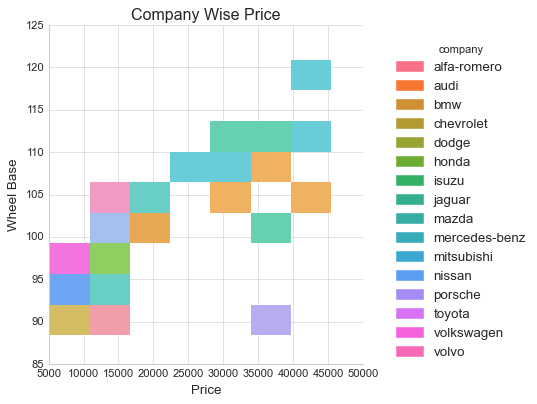

In [31]:
plt.figure(figsize=(8,10))
plt.style.use('seaborn-v0_8-whitegrid')
sns.displot(x='price', y='wheel-base', hue='company', legend=True, data=car)
plt.title('Company Wise Price')
plt.xlabel('Price')
plt.ylabel('Wheel Base')
plt.show()

<style>
h2{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
## Car <i>Price</i> vs <b>Body Style</b> and <b>Lenght</b> ##

<Figure size 640x800 with 0 Axes>

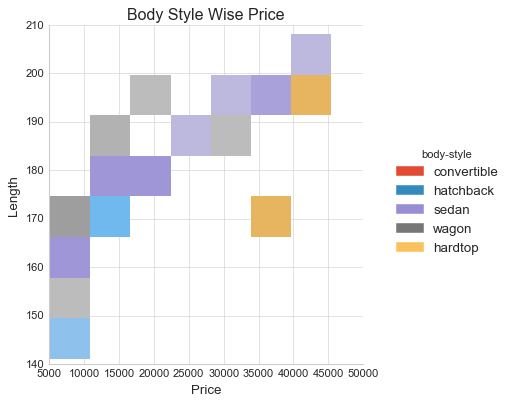

In [32]:
plt.figure(figsize=(8,10))
plt.style.use('seaborn-v0_8-whitegrid')
sns.displot(x='price', y='length', hue='body-style', legend=True, data=car)
plt.title('Body Style Wise Price')
plt.xlabel('Price')
plt.ylabel('Length')
plt.show()

<style>
h2{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
## Car <i>Price</i> vs <b>Horsepower</b> and <b>Number Of Cylinders</b> ##

<Figure size 640x800 with 0 Axes>

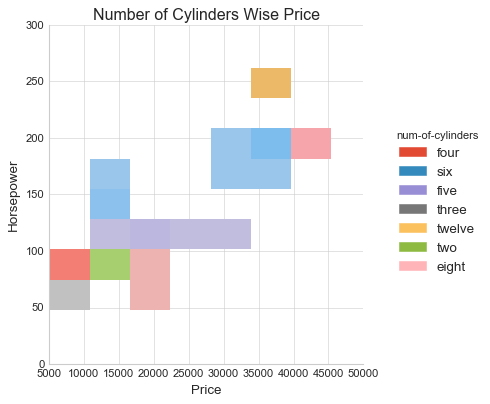

In [33]:
plt.figure(figsize=(8,10))
plt.style.use('seaborn-v0_8-whitegrid')
sns.displot(x='price', y='horsepower', hue='num-of-cylinders', legend=True, data=car)
plt.title('Number of Cylinders Wise Price')
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.show()

<style>
h2{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
## Car <i>Price</i> vs <b>Average Milage</b> and <b>Engine Type</b> ##

<Figure size 640x800 with 0 Axes>

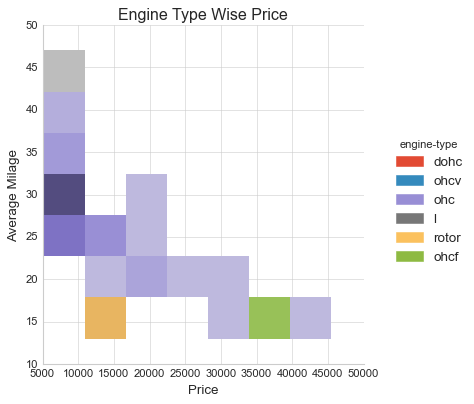

In [34]:
plt.figure(figsize=(8,10))
plt.style.use('seaborn-v0_8-whitegrid')
sns.displot(x='price', y='average-mileage', hue='engine-type', legend=True, data=car)
plt.title('Engine Type Wise Price')
plt.xlabel('Price')
plt.ylabel('Average Milage')
plt.show()

<style>
h2{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
## Sorting Data by <b><i>Price</i></b> :- ##

In [117]:
car_price_sort = car.sort_values(by='price')

In [91]:
# Printing Sorted Data
car_price_sort.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
16,chevrolet,hatchback,88.4,141.1,l,three,48,47,5151.0
36,mazda,hatchback,93.1,159.1,ohc,four,68,30,5195.0
66,toyota,hatchback,95.7,158.7,ohc,four,62,35,5348.0
49,mitsubishi,hatchback,93.7,157.3,ohc,four,68,37,5389.0
37,mazda,hatchback,93.1,159.1,ohc,four,68,31,6095.0


<style>
h2{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
## Car <i>Price</i> vs <b>Company</b>  Using <i>Sorted Values</i> ##

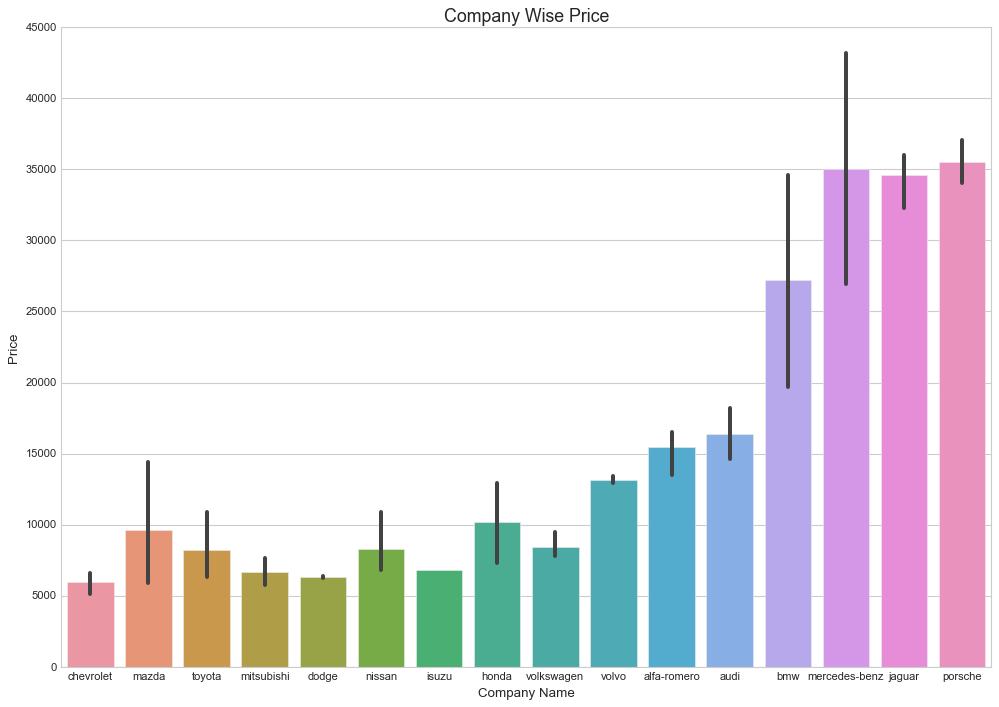

In [65]:
plt.figure(figsize=(15, 10))
plt.style.use('seaborn-v0_8-whitegrid')
sns.barplot(x='company', y='price', data=car_price_sort)
plt.title('Company Wise Price')
plt.xlabel('Company Name')
plt.ylabel('Price')
plt.show()

<style>
h2{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
## Car <i>Price</i> vs <b>Body Style</b>  Using <i>Sorted Values</i> ##

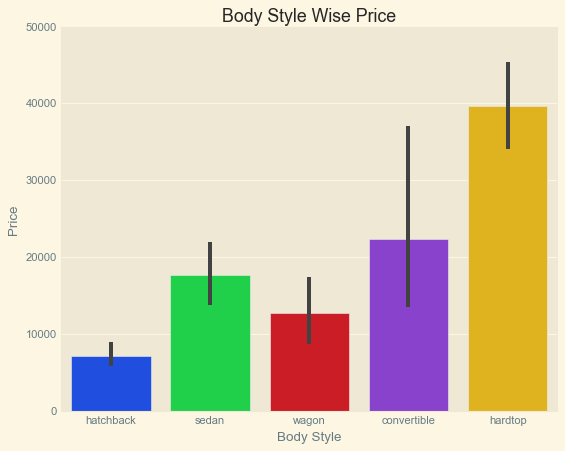

In [73]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn-v0_8-bright')
sns.barplot(x='body-style', y='price', data=car_price_sort)
plt.title('Body Style Wise Price')
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.show()

<style>
h2{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
## Car <i>Price</i> vs <b>Number of Cylinders</b>  Using <i>Sorted Values</i> ##

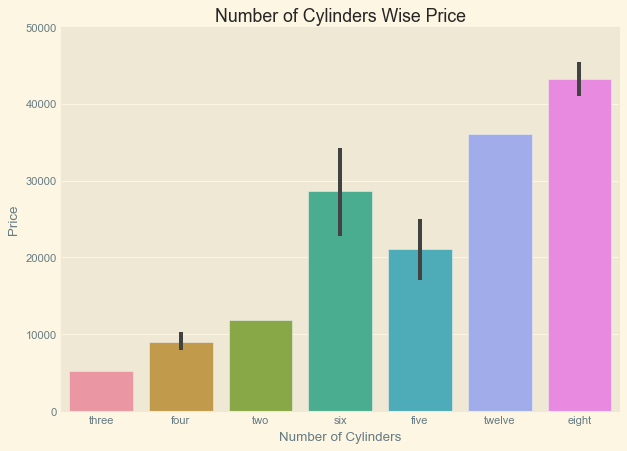

In [83]:
plt.figure(figsize=(9,6))
plt.style.use('_classic_test_patch')
sns.barplot(x='num-of-cylinders', y='price', data=car_price_sort)
plt.title('Number of Cylinders Wise Price')
plt.xlabel('Number of Cylinders')
plt.ylabel('Price')
plt.show()

<style>
h2{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
## Car <i>Price</i> vs <b>Engine Type</b>  Using <i>Sorted Values</i> ##

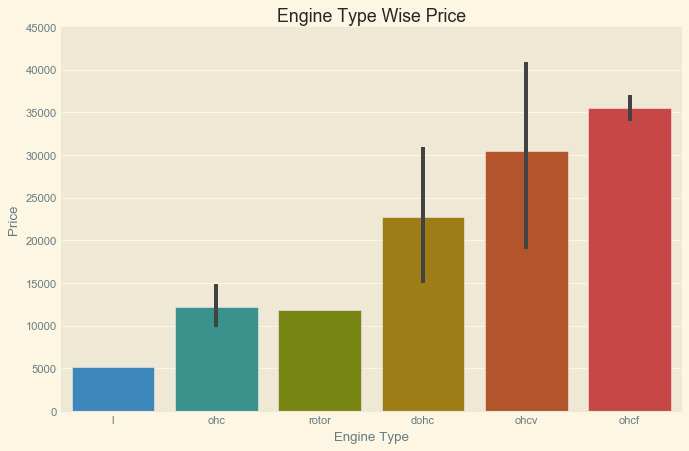

In [84]:
plt.figure(figsize=(10,6))
plt.style.use('Solarize_Light2')
sns.barplot(x='engine-type', y='price', data=car_price_sort)
plt.title('Engine Type Wise Price')
plt.xlabel('Engine Type')
plt.ylabel('Price')
plt.show()

<style>
h1{color: rgb(255, 26, 26); background-color: rgb(0, 255, 255);}
</style>
# <b> Machiene Learning using Linear Regression to <i>Predict</i> Car <u>"Price"</u></b> #

<style>
h2{color: rgb(51, 153, 255); background-color: rgb(255, 255, 0);}
</style>
## <b>From here we are going to use multiple model which will give us Accurecy of the program. </b> ##

<style>
h2{color: rgb(255, 102, 0)}
</style>
## Changing Chategorocal Values Using <i><b>Label Encoder</b></i> ##

LabelEncoder is a technique used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b>Model 1</b> ###

In [123]:
# Copy of original Data Frame
car_mod_1 = car.copy()

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b>Label Enocder Implement</b> ###

In [140]:
car_label_replace = LabelEncoder()
car_mod_1['company'] = car_label_replace.fit_transform(car_mod_1['company'])
car_mod_1['body-style'] = car_label_replace.fit_transform(car_mod_1['body-style'])
car_mod_1['engine-type'] = car_label_replace.fit_transform(car_mod_1['engine-type'])
car_mod_1.replace({'num-of-cylinders': {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}}, inplace=True)

<style>
h3{color: rgb(255, 153, 0)}
</style>
### Verify Changes ###

In [141]:
# Veryfying Changes
car_mod_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           58 non-null     int64  
 1   body-style        58 non-null     int64  
 2   wheel-base        58 non-null     float64
 3   length            58 non-null     float64
 4   engine-type       58 non-null     int64  
 5   num-of-cylinders  58 non-null     int64  
 6   horsepower        58 non-null     int64  
 7   average-mileage   58 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(6)
memory usage: 4.5 KB


<style>
h2{color: rgb(255, 102, 0)}
</style>
## <b> Correlation Of all Coloumns in "Model 1" </b> ##

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Correlation Chart </b> ###

In [155]:
car_mod_1.corr().style.background_gradient(cmap='YlGnBu')

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
company,1.000000,0.190051,-0.012603,-0.047085,0.126324,-0.097692,-0.187885,0.242883,-0.205502
body-style,0.190051,1.000000,0.432152,0.322310,-0.033776,-0.007318,-0.135047,0.022190,-0.110904
wheel-base,-0.012603,0.432152,1.000000,0.881866,0.070895,0.516737,0.509146,-0.547084,0.663085
length,-0.047085,0.322310,0.881866,1.000000,0.091408,0.633069,0.727067,-0.780370,0.788465
engine-type,0.126324,-0.033776,0.070895,0.091408,1.000000,0.304646,0.247286,-0.204637,0.191193
num-of-cylinders,-0.097692,-0.007318,0.516737,0.633069,0.304646,1.000000,0.843596,-0.616336,0.765225
horsepower,-0.187885,-0.135047,0.509146,0.727067,0.247286,0.843596,1.000000,-0.842615,0.901707
average-mileage,0.242883,0.022190,-0.547084,-0.780370,-0.204637,-0.616336,-0.842615,1.000000,-0.770217
price,-0.205502,-0.110904,0.663085,0.788465,0.191193,0.765225,0.901707,-0.770217,1.000000


<style>
h2{color: rgb(230, 46, 0)}
</style>
## <b> Conclution </b> ##

<ol>
<li> <b> Compnay, Body Style, Engine Type </b> have mild or we can say no correlation with <i><b>Price</b></i> column. </li>
<li> <b> Wheel Base, Length, Number of Cylinders and Horsepower </b> have strong correlation with <i><b>Price</b></i> column. </li>
<li> <b> Average Mileage </b> has negative correlation with <i><b>Price</b></i> column. </li></ol>


<b> We can conclude that <i> Compnay, Body Style, Engine Type </i> remove this column from our model. </b>

<style>
h2{color: rgb(255, 102, 0)}
</style>
## <b> Verify With <i> HeatMap </i> </b> ##

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> HeatMap <i> "Model 1" </i> </b> ###

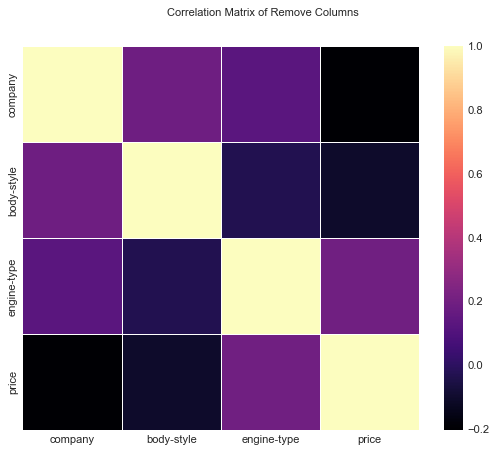

In [168]:
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.heatmap(data=car_mod_1[['company', 'body-style', 'engine-type', 'price']].corr(), linewidths=0.5, cmap='magma')
plt.suptitle('Correlation Matrix of Remove Columns')
plt.show()

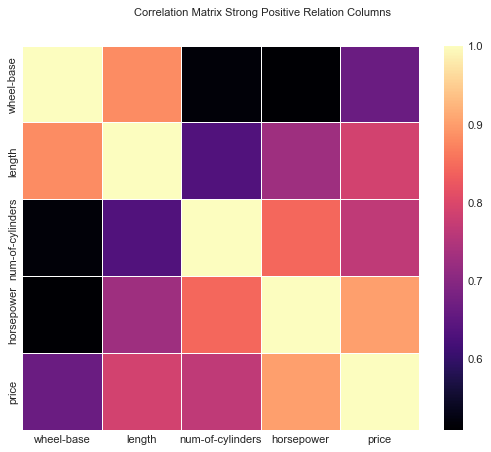

In [170]:
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.heatmap(data=car_mod_1[['wheel-base', 'length', 'num-of-cylinders', 'horsepower', 'price']].corr(), linewidths=0.5, cmap='magma')
plt.suptitle('Correlation Matrix Strong Positive Relation Columns')
plt.show()

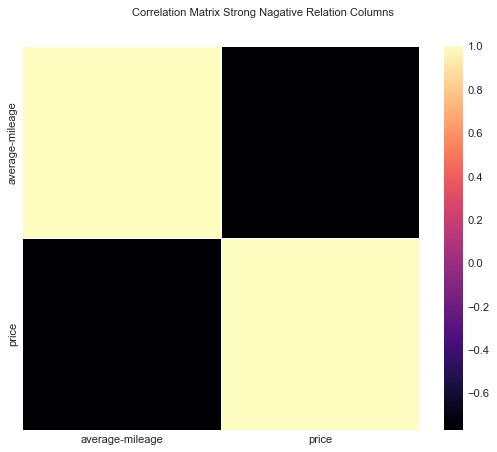

In [171]:
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.heatmap(data=car_mod_1[['average-mileage', 'price']].corr(), linewidths=0.5, cmap='magma')
plt.suptitle('Correlation Matrix Strong Nagative Relation Columns')
plt.show()

<style>
h2{rgb(255, 255, 179); background-color: rgb(0, 153, 204);}
</style>
## <b> Machiene Learning using Linear Regression </b> ##

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b> Seltecting Target And Feature </b> ###

In [174]:
feature = car_mod_1.drop(['price', 'company', 'body-style', 'engine-type'],  axis=1)
target = car_mod_1['price']

In [175]:
### Printing our Feature ###
feature.head()

,wheel-base,length,num-of-cylinders,horsepower,average-mileage
index,,,,,
0,88.6,168.8,4,111,21
1,88.6,168.8,4,111,21
2,94.5,171.2,6,154,19
3,99.8,176.6,4,102,24
4,99.4,176.6,5,115,18


In [176]:
### Printing our Target ###
target.head()

index
0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

Looks, Great. 

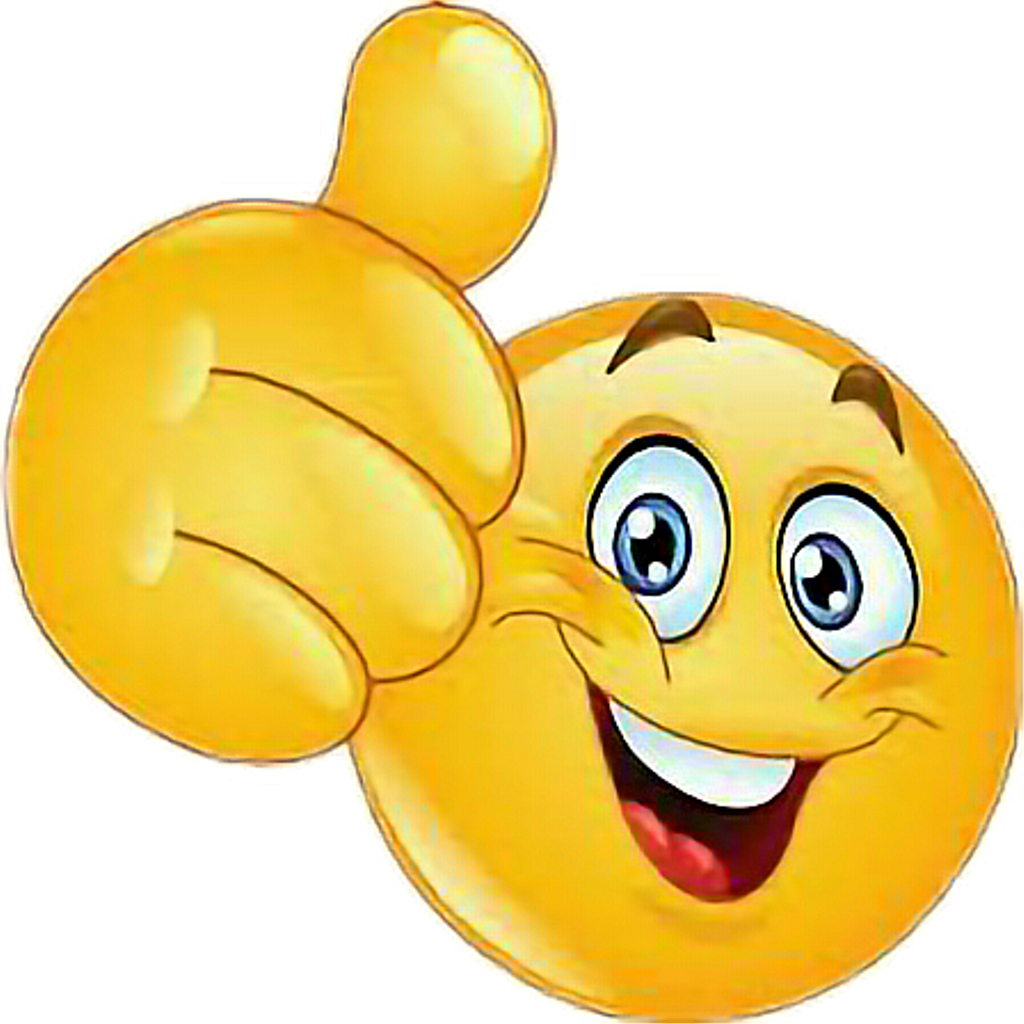

In [177]:
Image('https://www.pngkit.com/png/full/16-162327_ok-oki-emotions-ftstickers-emoji-emojistickers-yelowfac-smiley.png')

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b> Splitting our data to train our <i> Model </i> </b> ###

In [283]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.20, random_state=0)

<style>
h3{color: rgb(255, 153, 0)}
</style>
### Checking our "Train and Test Data ###

In [284]:
x_train.head()

,wheel-base,length,num-of-cylinders,horsepower,average-mileage
index,,,,,
43,104.9,175.0,4,72,31
55,94.5,165.3,4,69,31
46,120.9,208.1,8,184,14
56,94.5,170.2,4,69,31
52,96.3,172.4,4,88,25


In [285]:
y_train.head()

index
43    18344.0
55     6849.0
46    40960.0
56     7349.0
52     8189.0
Name: price, dtype: float64

In [286]:
x_test.head()

,wheel-base,length,num-of-cylinders,horsepower,average-mileage
index,,,,,
50,93.7,157.3,4,68,31
49,93.7,157.3,4,68,37
57,100.4,184.6,6,152,19
38,93.1,159.1,4,68,31
14,103.5,193.8,6,182,16


In [288]:
y_test.head()

index
50     6189.0
49     5389.0
57    13499.0
38     6795.0
14    41315.0
Name: price, dtype: float64

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b> Fitting our data to train our <i> Model </i> </b> ###

In [289]:
# Define the Model
car_model = LinearRegression()

# Fitting the model in Traing Data
car_model.fit(x_train, y_train) 

LinearRegression()

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b> Definig <i>M</i> and <i>C</i> of our <i> Model </i> </b> ###

In [290]:
m = car_model.coef_           
c = car_model.intercept_

In [291]:
# Printing m and c
print('\"M\" of the Model is : ', m)
print('\n')
print('\"C\" of the Model is : ', c)

"M" of the Model is :  [  525.53300106   -52.10501769 -1145.37258384   227.83850035
   175.83185808]


"C" of the Model is :  -50749.432585164555


<style>
h2{rgb(255, 255, 179); background-color: rgb(0, 153, 204);}
</style>
## <b> Prdict Car <i> Price </i> using <u> Linear Regression </u> </b> ##

In [292]:
# Predicting Traning Data using our Linear Model 1
y_prediction_train = car_model.predict(x_train)

In [293]:
# Predicting Testing Data using our Linear Model 1
y_prediction_test = car_model.predict(x_test)

<style>
h3{color: rgb(255, 153, 0)}
</style>
### Checking <b> Mean Squared error </b> of our "Model" ###

In [294]:
print('Mean Squared error of our Traning Data : ', mean_squared_error(y_train, y_prediction_train))
print('Mean Squared error of our Testing Data : ', mean_squared_error(y_test, y_prediction_test))

Mean Squared error of our Traning Data :  11573414.638976349
Mean Squared error of our Testing Data :  33645599.255199075


<style>
h3{color: rgb(255, 153, 0)}
</style>
### Checking <b> Mean Absolute error </b> of our "Model" ###

In [295]:
print('Mean Absolute error of our Traning Data : ', mean_absolute_error(y_train, y_prediction_train))
print('Mean Absolute error of our Testing Data : ', mean_absolute_error(y_test, y_prediction_test))

Mean Absolute error of our Traning Data :  2595.951918766085
Mean Absolute error of our Testing Data :  3988.282068132263


<style>
h2{rgb(255, 255, 179); background-color: rgb(0, 153, 204);}
</style>
## <b> Model Accurecy on Both Train and Test Data </b> ##

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b> Training Accurecy <b> ###

In [296]:
train_accuracy = r2_score(y_train, y_prediction_train)
print(f'The model training is accurate of {train_accuracy*100:.2f}% .')

The model training is accurate of 88.75% .


<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b> Testing Accurecy <b> ###

In [297]:
test_accuracy = r2_score(y_test, y_prediction_test)
print(f'The model testing is accurate of {test_accuracy*100:.2f}% .')

The model testing is accurate of 83.02% .


In [300]:
y_test

index
50     6189.0
49     5389.0
57    13499.0
38     6795.0
14    41315.0
2     16500.0
47    45400.0
66     5348.0
33    32250.0
69     6918.0
4     17450.0
13    30760.0
Name: price, dtype: float64

In [301]:
y_prediction_test

array([ 6659.20562057,  7714.19676903, 23495.5163093 ,  6250.09678809,
       30952.96188602, 21548.75584074, 32951.89341638,  6973.62102816,
       34100.45343335,  5697.13840129, 15926.33966268, 31203.06597092])